## VERI TIPI I (verinin gelebilecegi tiplerden biri)

In [21]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                 25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                 32,33,33,33,31,32,33,26,32,33,29])
A_B = pd.concat([A,B], axis = 1)
A_B.columns = ["A","B"]
#A_B.head(len(A_B))___HEAD İCİ Grafigin uzunlugu oluyor
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


## VERI TIPI II (Amelasyon_En zor olusturma yontemi)

In [38]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                 25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                 32,33,33,33,31,32,33,26,32,33,29])
import numpy as np
# A ve A'nın Grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

# B ve B'nın Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1) 

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


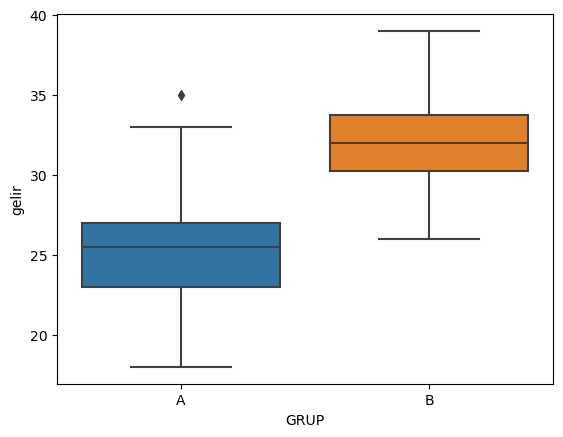

In [111]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

In [47]:
## Bağımsız İki Örneklem T Testi "VARSAYIM KONTROLU"

In [45]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [46]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


## NORMALLIK VARSAYIMI 

In [49]:
from scipy.stats import shapiro

In [59]:
# Burada "A" degiskeni cekilip normallik varsayimi uygulandi
print("T Hesap İstatistigi: " + str(shapiro(A_B.A)[0]))
print("Hesaplanan P-Value: " + str(shapiro(A_B.A)[1]))
##Bizden fonksiyonun kendisi isteniyor. Ikinci veri yapisi kullanilamaz.

T Hesap İstatistigi: 0.9789243936538696
Hesaplanan P-Value: 0.7962851524353027


 1.GRUP(DEGISKEN__A) VARSAYIMI YORUMU
 "P-Value < 0.05 DEGİL" // H0:Reddeilemez Ornek ve teoreik dagilim da fark 
 yoktur.

In [72]:
#Burada "B" degiskeni cekilip normallik varsayimi uygulandi
print("T Hesap İstatistigi: " + str(shapiro(A_B.B)[0]))
print("Hesaplanan P-Value: " + str(shapiro(A_B.B)[1]))
##Bizden fonksiyonun kendisi isteniyor. Ikinci veri yapisi kullanilamaz.

T Hesap İstatistigi: 0.9561262130737305
Hesaplanan P-Value: 0.24584470689296722


2.GRUP(DEGISKEN__B) VARSAYIMI YORUMU
"P-Value < 0.05 DEGİL" // H0:Reddedilemez Ornek ve teoreik dagilim da fark 
yoktur 


## VARYANS HOMOJENLIGI VARSAYIMI 

In [65]:
# H0: Varyanslar homojendir
# H1: Varyanslar homojen degildir

In [70]:
from scipy.stats import levene
levene(A_B.A, A_B.B) #hıpotezı test ediyor. P-Value gore red veya degil

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

P-Value < 0.05 DEGİL. H0:Reddedilemez. Varyanslar Homojendir

## Bağımsız İki Örneklem T Testi Uygulaması

In [112]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var = True)#varyans homojenligi saglandi

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [113]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"],A_B["B"],equal_var = True)
print("Test Istatistigi = %.4f, P-Value = %.4f" % (test_istatistigi, pvalue))

Test Istatistigi = -7.0287, P-Value = 0.0000


P-Value < 0.05'dir. Farklilik vardir. Farklilik olmadigini iddia edern H0 hipotezi reddedilir. Yigin ortalamalari esşittir diyen H0 reddilir.
Boxplot'dan gorulecegi uzere B(YeniGrup)nin ortalamasi daha yuksektir.

## Nonparametrik Bagımsız İki Orneklem Testi
Varsayimlarin saglanmadigi dusunuluyor

In [109]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [110]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"],A_B["B"])
print("Test Istatistigi = %.4f, P-Value = %.4f" % (test_istatistigi, pvalue))

Test Istatistigi = 89.5000, P-Value = 0.0000


NonParametrik testte de anlamlii fark vardir yani H0 reddildi.
P-Value < 0.05 H0: Reddedildi